In [1]:
from Analysis import analysis
from Analysis import ROC_curve
from Analysis import get_pcam_generators
from Analysis import get_model

import os

import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow import keras

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

# the size of the images in the PCAM dataset
IMAGE_SIZE = 96

In [ ]:
# get the model
model = get_model()

In [2]:
# get the data generators
train_gen, val_gen = get_pcam_generators('C:/Users/20182372/Documents/TUE/Jaar 3 BMT/Kwartiel 3/Project Imaging/BIA Data')

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [7]:
# save the model and weights
model_name = 'my_first_cnn_model'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

model_json = model.to_json() # serialize model to JSON
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 


# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]


# train the model
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20182372\Anaconda3\envs\BIA\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 402s 88ms/step - loss: 0.5437 - accuracy: 0.7160 - val_loss: 0.4203 - val_accuracy: 0.8091

Epoch 00001: val_loss improved from inf to 0.42035, saving model to my_first_cnn_model_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 321s 71ms/step - loss: 0.4091 - accuracy: 0.8147 - val_loss: 0.3631 - val_accuracy: 0.8411

Epoch 00002: val_loss improved from 0.42035 to 0.36306, saving model to my_first_cnn_model_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 318s 71ms/step - loss: 0.3506 - accuracy: 0.8475 - val_loss: 0.3228 - val_accuracy: 0.8594- lo - ETA: 59s  - ETA: 57s - loss: 0.3514 - accuracy:  - ETA: 57s - loss: 0.3514 - accu - ETA: 56s - - ETA:  - ETA: 25s - loss:  - ETA: 24s - loss: - ETA: 22s - lo - ETA: 0s - loss: 0.3506 - 

Epoch 00003: val_loss improved from 0.36306 to 0.32285, saving model to my_first_cnn_model_weights.hdf5


In [3]:
json_file = open('my_first_cnn_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("my_first_cnn_model_weights.hdf5")
print("Loaded model from disk")

Loaded model from disk


C:\Users\20182372\Anaconda3\envs\BIA\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


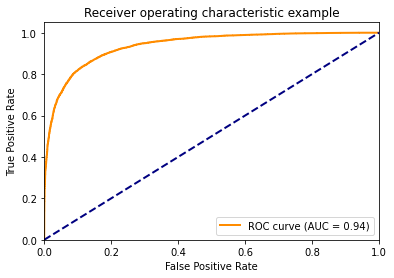

In [4]:
ROC_curve(loaded_model, val_gen)

C:\Users\20182372\Anaconda3\envs\BIA\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


0.8406586897287052 0.8804074613044054


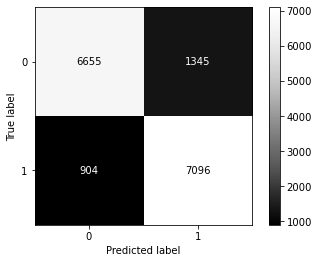

In [4]:
analysis(loaded_model, val_gen)